In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import display
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam
from keras.utils import np_utils
from keras.models import load_model

In [64]:
df = pd.read_csv('./4_1_kagle_dataset/3_survey/1_data/survey.csv')

In [65]:
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [66]:
df = df.drop(["Timestamp","Country","state","comments"], axis=1)

In [67]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in df:
    if feature in intFeatures:
        df[feature] = df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        df[feature] = df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        df[feature] = df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
# df.head(5)

In [68]:
#Genderを小文字に統一しユニーク値を確認する
gender = df['Gender'].str.lower()
# print(gender.unique())

In [69]:
male_str = ['m','male','male-ish','maile','cis male','mal','male (cis)','make','guy (-ish) ^_^','male ','man','msle','mail','malr','cis man']
female_str = ['f','female','cis female','woman','femake','female','cis-female/femme','female (cis)','femail',]
for (row, col) in df.iterrows():
    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='m', inplace=True)
    elif str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='f', inplace=True)
    else:
        df['Gender'].replace(to_replace=col.Gender, value='unknown', inplace=True)

In [70]:
df['self_employed'] = df['self_employed'].replace([defaultString], 'No')
print(df['self_employed'].unique())
df['work_interfere'] = df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(df['work_interfere'].unique())

['No' 'Yes']
['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [71]:
#LabelEncoder
for feature in df:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])

df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,25,0,0,0,1,2,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,32,1,0,0,0,3,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,20,1,0,0,0,3,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,19,1,0,1,1,2,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,19,1,0,0,0,1,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


In [72]:
# 目的変数、説明変数
feature_cols = ['Age', 'Gender', 'self_employed','family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = df[feature_cols]
y = df.treatment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [73]:
# one-hotベクトルに変換
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [83]:
# NNの設定
model = Sequential()
model.add(Dense(6, activation='relu', input_dim=9))
model.add(Dense(5, activation='relu', input_dim=6))
model.add(Dense(5, activation='relu', input_dim=5))
model.add(Dense(3, activation='relu', input_dim=5))
model.add(Dense(2, activation='softmax')) # 最終層のactivationは変更しないこと

#lr：学習率
sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Train on 881 samples, validate on 378 samples
Epoch 1/200
881/881 [==============================] - 0s 178us/step - loss: 0.6948 - acc: 0.4915 - val_loss: 0.6935 - val_acc: 0.5026
Epoch 2/200
881/881 [==============================] - 0s 151us/step - loss: 0.6949 - acc: 0.5017 - val_loss: 0.6935 - val_acc: 0.4974
Epoch 3/200
881/881 [==============================] - 0s 151us/step - loss: 0.6949 - acc: 0.4642 - val_loss: 0.6931 - val_acc: 0.5026
Epoch 4/200
881/881 [==============================] - 0s 137us/step - loss: 0.6950 - acc: 0.4892 - val_loss: 0.6932 - val_acc: 0.5026
Epoch 5/200
881/881 [==============================] - 0s 144us/step - loss: 0.6944 - acc: 0.5062 - val_loss: 0.6932 - val_acc: 0.4974
Epoch 6/200
881/881 [==============================] - 0s 151us/step - loss: 0.6941 - acc: 0.5108 - val_loss: 0.6942 - val_acc: 0.4974
Epoch 7/200
881/881 [==============================] - 0s 179us/step - loss: 0.6968 - acc: 0.4699 - val_loss: 0.6938 - val_acc: 0.4974
Epoch 8/2

Epoch 61/200
881/881 [==============================] - 0s 151us/step - loss: 0.6949 - acc: 0.4960 - val_loss: 0.6942 - val_acc: 0.5026
Epoch 62/200
881/881 [==============================] - 0s 147us/step - loss: 0.6946 - acc: 0.4960 - val_loss: 0.6934 - val_acc: 0.5026
Epoch 63/200
881/881 [==============================] - 0s 146us/step - loss: 0.6964 - acc: 0.4847 - val_loss: 0.6935 - val_acc: 0.5026
Epoch 64/200
881/881 [==============================] - 0s 146us/step - loss: 0.6949 - acc: 0.5006 - val_loss: 0.6938 - val_acc: 0.5026
Epoch 65/200
881/881 [==============================] - 0s 148us/step - loss: 0.6943 - acc: 0.5040 - val_loss: 0.6943 - val_acc: 0.4974
Epoch 66/200
881/881 [==============================] - 0s 160us/step - loss: 0.6951 - acc: 0.5028 - val_loss: 0.6931 - val_acc: 0.5026
Epoch 67/200
881/881 [==============================] - 0s 404us/step - loss: 0.6955 - acc: 0.4983 - val_loss: 0.6947 - val_acc: 0.5026
Epoch 68/200
881/881 [==========================

881/881 [==============================] - 0s 477us/step - loss: 0.6948 - acc: 0.4904 - val_loss: 0.6933 - val_acc: 0.4974
Epoch 122/200
881/881 [==============================] - 0s 427us/step - loss: 0.6945 - acc: 0.4972 - val_loss: 0.6935 - val_acc: 0.4974
Epoch 123/200
881/881 [==============================] - 0s 532us/step - loss: 0.6949 - acc: 0.4631 - val_loss: 0.6931 - val_acc: 0.5026
Epoch 124/200
881/881 [==============================] - 0s 417us/step - loss: 0.6952 - acc: 0.5040 - val_loss: 0.6936 - val_acc: 0.4974
Epoch 125/200
881/881 [==============================] - 0s 410us/step - loss: 0.6952 - acc: 0.4904 - val_loss: 0.6938 - val_acc: 0.4974
Epoch 126/200
881/881 [==============================] - 0s 528us/step - loss: 0.6948 - acc: 0.4745 - val_loss: 0.6939 - val_acc: 0.4974
Epoch 127/200
881/881 [==============================] - 0s 555us/step - loss: 0.6944 - acc: 0.5062 - val_loss: 0.6940 - val_acc: 0.4974
Epoch 128/200
881/881 [==============================] 

Epoch 181/200
881/881 [==============================] - 0s 482us/step - loss: 0.6958 - acc: 0.4642 - val_loss: 0.6933 - val_acc: 0.5026
Epoch 182/200
881/881 [==============================] - 0s 455us/step - loss: 0.6946 - acc: 0.5017 - val_loss: 0.6932 - val_acc: 0.4974
Epoch 183/200
881/881 [==============================] - 0s 443us/step - loss: 0.6940 - acc: 0.5074 - val_loss: 0.6948 - val_acc: 0.5026
Epoch 184/200
881/881 [==============================] - 0s 471us/step - loss: 0.6938 - acc: 0.4938 - val_loss: 0.6940 - val_acc: 0.5026
Epoch 185/200
881/881 [==============================] - 0s 467us/step - loss: 0.6951 - acc: 0.4960 - val_loss: 0.6935 - val_acc: 0.5026
Epoch 186/200
881/881 [==============================] - 0s 482us/step - loss: 0.6952 - acc: 0.4790 - val_loss: 0.6937 - val_acc: 0.4974
Epoch 187/200
881/881 [==============================] - 0s 407us/step - loss: 0.6955 - acc: 0.4904 - val_loss: 0.6935 - val_acc: 0.4974
Epoch 188/200
881/881 [==================

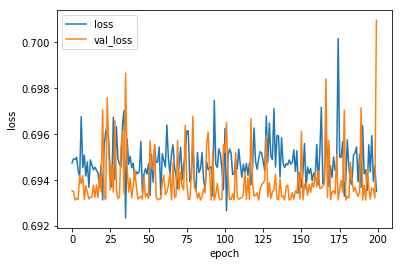

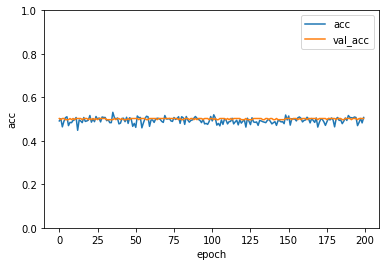

In [94]:
# 計算の実行
# epochs：パラメータの更新回数（全データを使うまでが1epoch）
# batch_size：１回の更新に使うデータサイズ
epochs=200
batch_size=10
fit = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()

In [85]:
weights = model.get_weights()
for i in range(len(weights)):
    print("weights[%s]=" %i)
    print(weights[i])
    print("num:",weights[i].flatten().shape[0])
    print()

weights[0]=
[[-0.55188656 -0.24348333 -0.27106863 -0.28597203  0.4708815  -0.60874695]
 [ 0.401597   -0.20682292  0.00961654  0.15896496 -0.10126185 -0.4629705 ]
 [ 0.438676    0.08222827 -0.08374203  0.41200408  0.4035182   0.25646234]
 [-0.03554023 -0.41203165  0.37189692 -0.27919775  0.07276164 -0.3259036 ]
 [-0.5402416  -0.46281716 -0.5522898  -0.2508226   0.23289172 -0.05209029]
 [ 0.52761215  0.2187676  -0.18918471 -0.5225151   0.18500373 -0.35640794]
 [-0.01712235  0.6143064   0.13592556 -0.50506353 -0.08377022  0.46670145]
 [ 0.360006   -0.605628    0.57332426  0.55446094 -0.11750469  0.35591322]
 [ 0.14228769 -0.24693228 -0.021709    0.42636988 -0.6645336  -0.3273459 ]]
num: 54

weights[1]=
[ 0.00192561 -0.03042625 -0.01286129 -0.01214162  0.00075251  0.        ]
num: 6

weights[2]=
[[ 0.6676631   0.58390677 -0.16287822 -0.03079024  0.37436527]
 [ 0.42849082  0.32631174  0.14182967 -0.623959   -0.59443134]
 [-0.4987834  -0.4549105  -0.51541644 -0.21418586 -0.66170007]
 [ 0.056

In [86]:
# 保存
model.save('my_model.h5')
del model
# 読み込み
model = load_model('my_model.h5')

In [87]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,